<a href="https://colab.research.google.com/github/BennettPJ/Data-Engineering-Project/blob/main/Bennett_Jackson_ISTA322_Covid_Flights_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is Bennett Jackson's ISTA 322 Final project notebook

## Overall goal:
The goal of this full ETL pipeline will be to take information from three sources to make inferences about how domestic flights in the United States of America were effected by COVID-19. The COVID-19 data will be aggregated by a daily number of new cases and new deaths per state. The Airline data will be aggregated to see total number of flights each day as well as their source and destination states. This will alow for inferences to be made about how the increase in COVID-19 cases impacted the domestic airline market.

## Additional goals of this notebook:
- perform the full ETL process on three sources of data
  - The three sources of data are:
    - The OpenSky REST API:
      - OpenSky Network home page: https://opensky-network.org/
      - REST API Documentation: https://openskynetwork.github.io/opensky-api/
    - Covid Data (Hosted in my personal google drive):
      - Data was obtained from: https://github.com/nytimes/covid-19-data/tree/master
      - Shared Google Drive data file 1: https://drive.google.com/file/d/1CEa5DLR5vr4RQWXb1vRgeoxhqeDAzfq4/view?usp=sharing
      - Shared Google Drive data file 2: https://drive.google.com/file/d/1gmlQr6pVwEsS3x5bpUf4Kz-MvdXBTkxD/view?usp=sharing
      - Shared Google Drive data file 3: https://drive.google.com/file/d/10h8HT4cTvp49pO0vMB9IfJ26Xj_NPYH_/view?usp=sharing
      - Shared Google Drive data file 4: https://drive.google.com/file/d/13MgZoeAbWEJhqqNy-UE5ZzG8nQSn3W_z/view?usp=sharing
    - Airport data (Hosted in my personal google drive):
      - Home page explaining data: https://ourairports.com/data/
      - Shared Google Drive data: https://drive.google.com/file/d/1IULaBj8O_paS8TaBrgWYxF0sRTICXbCS/view?usp=sharing

## Roadmap:
- Install and import necessary dependencies

- Import the Covid data:
- Explore the data by looking at the:
  - Shape of the dataframe
  - Head of the dataframe
  - Tail of the dataframe
  - Datatypes of the dataframe
  - Use describe function for descriptive statistics
- Clean, aggregate, and verify the Covid data by:
  - calculating daily values
  - removing extra columns
  - add unique ID's
- Import the airports data:
- Explore the data by looking at the:
  - Shape of the dataframe
  - Head of the dataframe
  - Tail of the dataframe
  - Datatypes of the dataframe
- Clean, aggregate, and verify the airport data by:
  - Removing unnecessary columns
  - Remove countires that are not the United States (as this project is focusing on domestic data)
  - Check and remove any duplicate airports by airport code
  - Get state ID's and add to data frame
- Use API to get all flights and build up new table for domestic flights based off airport data.
  - get the total number of flights per day in one dataframe
  - get the actual flight data in a different dataframe
  - assign unique ID's and add relational columns
- Push to SQL database and build tables and references
- Make SQL queries




## Install and Import Dependencies:

In [ ]:
#Install Dependencies
!pip install mysql-connector-python

# Import Dependencies
import mysql.connector
from datetime import datetime, timedelta
import time
import requests
import json
import pandas as pd
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor, as_completed # This will be used to make API requests in parallel
import numpy as np

# Covid data:

## Import Covid data and explore it:

### Covid data 2020


In [ ]:
# Import and look at head of the first set of covid data
# Data hosted on my Google Drive (Can be accessed from links in description of this notebook)
# The following URL is to make the data downloadable
url = 'https://drive.google.com/uc?export=download&id=1CEa5DLR5vr4RQWXb1vRgeoxhqeDAzfq4'

# Read the CSV file into a DataFrame
covid_data_2020_df = pd.read_csv(url)
covid_data_2020_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
#Check the datatypes of the columns to see if one big dataframe can be made
covid_data_2020_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
#Check the shape of the dataframe
covid_data_2020_df.shape

(884737, 6)

### Covid data 2021


In [ ]:
# Import and look at head of the first set of covid data
# Data hosted on my Google Drive (Can be accessed from links in description of this notebook)
# The following URL is to make the data downloadable
url = 'https://drive.google.com/uc?export=download&id=1gmlQr6pVwEsS3x5bpUf4Kz-MvdXBTkxD'

# Read the CSV file into a DataFrame
covid_data_2021_df = pd.read_csv(url)
covid_data_2021_df.head()

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0


In [ ]:
#Check the datatypes of the columns to see if one big dataframe can be made
covid_data_2021_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
#Check the shape of the dataframe
covid_data_2021_df.shape

(1185373, 6)

### Covid data 2022

In [ ]:
# Import and look at head of the first set of covid data
# Data hosted on my Google Drive (Can be accessed from links in description of this notebook)
# The following URL is to make the data downloadable
url = 'https://drive.google.com/uc?export=download&id=10h8HT4cTvp49pO0vMB9IfJ26Xj_NPYH_'

# Read the CSV file into a DataFrame
covid_data_2022_df = pd.read_csv(url)
covid_data_2022_df.head()

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0


In [ ]:
#Check the datatypes of the columns to see if one big dataframe can be made
covid_data_2022_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
#Check the shape of the dataframe
covid_data_2022_df.shape

(1188042, 6)

### Covid data 2023

In [ ]:
# Import and look at head of the first set of covid data
# Data hosted on my Google Drive (Can be accessed from links in description of this notebook)
# The following URL is to make the data downloadable
url = 'https://drive.google.com/uc?export=download&id=13MgZoeAbWEJhqqNy-UE5ZzG8nQSn3W_z'

# Read the CSV file into a DataFrame
covid_data_2023_df = pd.read_csv(url)
covid_data_2023_df.head()

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0


In [ ]:
#Check the datatypes of the columns to see if one big dataframe can be made
covid_data_2023_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
#Check the shape of the dataframe
covid_data_2023_df.shape

(267009, 6)

### Merege into one large dataframe and then explore data:

In [ ]:
# Since all of the columns and datatypes are the same one large dataframe can be created
covid_data_df = pd.concat([covid_data_2020_df, covid_data_2021_df, covid_data_2022_df, covid_data_2023_df], ignore_index=True)

In [ ]:
#Check the number of rows and columns of the dataframe
# If the concat operation was successful it should be (3525161, 6)
covid_data_df.shape

(3525161, 6)

In [ ]:
#Check the head of the dataframe
covid_data_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
#Check the tail of the dataframe
covid_data_df.tail()

,date,county,state,fips,cases,deaths
3525156,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
3525157,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
3525158,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
3525159,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0
3525160,2023-03-23,Weston,Wyoming,56045.0,1906,23.0


In [ ]:
#Check the datatypes of the dataframe
covid_data_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [ ]:
# Use the describe function on the dataframe
covid_data_df.describe()

,fips,cases,deaths
count,3.490005e+06,3.525161e+06,3.443064e+06
mean,3.142436e+04,1.563556e+04,2.119097e+02
std,1.635235e+04,7.245254e+04,9.732151e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902700e+04,7.020000e+02,1.200000e+01
50%,3.001700e+04,2.875000e+03,4.900000e+01
75%,4.611500e+04,9.388000e+03,1.420000e+02
max,7.803000e+04,3.723182e+06,4.515500e+04


In [ ]:
#Check for duplicate rows
duplicates = covid_data_df.duplicated()
print(duplicates.sum())

0


In [ ]:
#The goal of this cell is to explore if there is any missing data points
deaths_na = covid_data_df['deaths'].isna().sum()
cases_na = covid_data_df['cases'].isna().sum()

print("NA values for deaths: " + str(deaths_na))
print("NA values for cases: " + str(cases_na))

NA values for deaths: 82097
NA values for cases: 0


In [ ]:
# In the description of the data if the county of the patient is unknown then that will be filled in
#This will check for those values
covid_data_df[covid_data_df['county'] == 'Unknown']

,date,county,state,fips,cases,deaths
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0
...,...,...,...,...,...,...
3524763,2023-03-23,Unknown,Texas,NaN,10766,0.0
3524813,2023-03-23,Unknown,Utah,NaN,5953,97.0
3524830,2023-03-23,Unknown,Vermont,NaN,3208,22.0
3524960,2023-03-23,Unknown,Virginia,NaN,894,0.0


After exploring the COVID-19 data it can be seen that the data will need to be cleaned to be useable for this project. The first step will be to convert the date object to data time. The next step will be to remove the fips column as it is not needed, and convert the deaths column to an integer. Then since some of the column names are misleading they will be renamed. For example, the cases column is cumulative data and this project is looking for new daily cases. Additionally, this data is broken up by county and will need to be aggregated to be at the state level. The Unknown counties value will be left alone and aggregated as one value per state. Since there are NA death values those will also need to be filled in properly. Additionally, this data includes US teritories as well as states so the teritories will need to be cleaned as this project is looking at the main US states.


## Clean and verify Covid data:

In [ ]:
# Remove the fips column as its not needed
cleaned_covid_data_df = covid_data_df[['date', 'county', 'state', 'cases', 'deaths']].copy() # Make a copy of our overall dataframe so it can be cleaned

#Verify the new dataframe was created and the fips and deaths column was removed
cleaned_covid_data_df.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [ ]:
#Remove the US teritories so only states are present
territories = ['American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia'] # A list of territories present that need to be removed

# Filter out the territories from the list above by using the negation operator
cleaned_covid_data_df = cleaned_covid_data_df[~cleaned_covid_data_df['state'].isin(territories)]

#Verify the cleaning worked
print(cleaned_covid_data_df['state'].unique())

['Washington' 'Illinois' 'California' 'Arizona' 'Massachusetts'
 'Wisconsin' 'Texas' 'Nebraska' 'Utah' 'Oregon' 'Florida' 'New York'
 'Rhode Island' 'Georgia' 'New Hampshire' 'North Carolina' 'New Jersey'
 'Colorado' 'Maryland' 'Nevada' 'Tennessee' 'Hawaii' 'Indiana' 'Kentucky'
 'Minnesota' 'Oklahoma' 'Pennsylvania' 'South Carolina' 'Kansas'
 'Missouri' 'Vermont' 'Virginia' 'Connecticut' 'Iowa' 'Louisiana' 'Ohio'
 'Michigan' 'South Dakota' 'Arkansas' 'Delaware' 'Mississippi'
 'New Mexico' 'North Dakota' 'Wyoming' 'Alaska' 'Maine' 'Alabama' 'Idaho'
 'Montana' 'West Virginia']


In [ ]:
#Change the date column to datetime
#The format will be YYYY-MM-DD
cleaned_covid_data_df['date'] = pd.to_datetime(cleaned_covid_data_df['date'], format='%Y-%m-%d')

#Verify the conversion worked
cleaned_covid_data_df.dtypes

date      datetime64[ns]
county            object
state             object
cases              int64
deaths           float64
dtype: object

In [ ]:
# Rename the columns to a more descriptive name
# IMPORTANT NOTE: PC stands for "Per County"
cleaned_covid_data_df.rename(columns={'date': 'Date', 'county': 'County', 'state': 'State', 'cases': 'Total_Cases_PC', 'deaths': 'Total_Deaths_PC'}, inplace=True)

#Verify the rename worked by looking at the head
cleaned_covid_data_df.head()

,Date,County,State,Total_Cases_PC,Total_Deaths_PC
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [ ]:
#The goal of this call will be to sort the data and fill any NaN values in the deaths column since there are many NA values present
#Since the data is cumulative the forward fill will be used
#Start by sorting the data
cleaned_covid_data_df.sort_values(by=['State', 'County', 'Date'], inplace=True)

#This will fill the NaN values with previous data since its cumulative
# Need to use groupby in case the first value of a county is null we don't want to use a forward filled datapoint
cleaned_covid_data_df['Total_Deaths_PC'] = cleaned_covid_data_df.groupby(['State', 'County'])['Total_Deaths_PC'].fillna(method='ffill')

#Any NaN values left they are at the begining of the history of deaths for that county so fill with 0
cleaned_covid_data_df['Total_Deaths_PC'] = cleaned_covid_data_df['Total_Deaths_PC'].fillna(0)

# Verify the filling of data worked
deaths_na = cleaned_covid_data_df['Total_Deaths_PC'].isna().sum()

print("NA values for deaths: " + str(deaths_na))

NA values for deaths: 0


In [ ]:
#This cell will convert the deaths datatype to an integer instead of a float since an integer makes more sense to the data
cleaned_covid_data_df['Total_Deaths_PC'] = cleaned_covid_data_df['Total_Deaths_PC'].astype(int)

#Verfity the datatype was properly changes
cleaned_covid_data_df.dtypes

Date               datetime64[ns]
County                     object
State                      object
Total_Cases_PC              int64
Total_Deaths_PC             int64
dtype: object

In [ ]:
#The goal of this cell is to get the daily number of new cases by county

# Calculate daily new cases at the county level
#The starting value will always be null as there is no data to base the .diff off of so we will fill it with 0
cleaned_covid_data_df['Daily_New_Cases_PC'] = cleaned_covid_data_df.groupby(['State', 'County'])['Total_Cases_PC'].diff().fillna(0)

# Convert column data from float to an int since there will never be a decimal amount of new cases
cleaned_covid_data_df['Daily_New_Cases_PC'] = cleaned_covid_data_df['Daily_New_Cases_PC'].astype(int)

# Calculate daily new cases at the county level
#The starting value will always be null as there is no data to base the .diff off of so we will fill it with 0
cleaned_covid_data_df['Daily_New_Deaths_PC'] = cleaned_covid_data_df.groupby(['State', 'County'])['Total_Deaths_PC'].diff().fillna(0)

#Convert column data from float to int as there won't be a decimal amount
cleaned_covid_data_df['Daily_New_Deaths_PC'] = cleaned_covid_data_df['Daily_New_Deaths_PC'].astype(int)


#Verify by looking at the top 20 entries
cleaned_covid_data_df.head(20)

,Date,County,State,Total_Cases_PC,Total_Deaths_PC,Daily_New_Cases_PC,Daily_New_Deaths_PC
9480,2020-03-24,Autauga,Alabama,1,0,0,0
10835,2020-03-25,Autauga,Alabama,4,0,3,0
12367,2020-03-26,Autauga,Alabama,6,0,2,0
14025,2020-03-27,Autauga,Alabama,6,0,0,0
15803,2020-03-28,Autauga,Alabama,6,0,0,0
17686,2020-03-29,Autauga,Alabama,6,0,0,0
19655,2020-03-30,Autauga,Alabama,7,0,1,0
21727,2020-03-31,Autauga,Alabama,7,0,0,0
23880,2020-04-01,Autauga,Alabama,10,0,3,0
26101,2020-04-02,Autauga,Alabama,10,0,0,0


In [ ]:
#This cell will move the columns around to make the dataframe look better
cleaned_covid_data_df = cleaned_covid_data_df.reindex(columns=['Date', 'County', 'State', 'Total_Cases_PC', 'Daily_New_Cases_PC', 'Total_Deaths_PC', 'Daily_New_Deaths_PC'])

#Verify it worked by checking the head
cleaned_covid_data_df.head(20)

,Date,County,State,Total_Cases_PC,Daily_New_Cases_PC,Total_Deaths_PC,Daily_New_Deaths_PC
9480,2020-03-24,Autauga,Alabama,1,0,0,0
10835,2020-03-25,Autauga,Alabama,4,3,0,0
12367,2020-03-26,Autauga,Alabama,6,2,0,0
14025,2020-03-27,Autauga,Alabama,6,0,0,0
15803,2020-03-28,Autauga,Alabama,6,0,0,0
17686,2020-03-29,Autauga,Alabama,6,0,0,0
19655,2020-03-30,Autauga,Alabama,7,1,0,0
21727,2020-03-31,Autauga,Alabama,7,0,0,0
23880,2020-04-01,Autauga,Alabama,10,3,0,0
26101,2020-04-02,Autauga,Alabama,10,0,0,0


In [ ]:
# The goal of this cell is to get the daily number of cases, new cases, deaths, and new deaths by state

#Make a new dataframe that holds the state level data instead of county level data
#Using the groupby the state will be part of the index so we need to reset it
state_level_df = cleaned_covid_data_df.groupby(['State', 'Date']).agg({
    'Total_Cases_PC': 'sum',
    'Daily_New_Cases_PC': 'sum',
    'Total_Deaths_PC': 'sum',
    'Daily_New_Deaths_PC': 'sum'
}).reset_index()

#Rename the columns so that they match the data that the dataframe is displaying
state_level_df.rename(columns={'State': 'State', 'Date': 'Date', 'Total_Cases_PC': 'Total_Cases',
                               'Daily_New_Cases_PC': 'Daily_New_Cases', 'Total_Deaths_PC': 'Total_Deaths',
                               'Daily_New_Deaths_PC': 'Daily_New_Deaths'}, inplace=True)

state_level_df.head(30)


,State,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths
0,Alabama,2020-03-13,6,0,0,0
1,Alabama,2020-03-14,12,5,0,0
2,Alabama,2020-03-15,23,8,0,0
3,Alabama,2020-03-16,29,6,0,0
4,Alabama,2020-03-17,39,8,0,0
5,Alabama,2020-03-18,51,10,0,0
6,Alabama,2020-03-19,78,24,0,0
7,Alabama,2020-03-20,106,23,0,0
8,Alabama,2020-03-21,131,24,0,0
9,Alabama,2020-03-22,157,26,0,0


<Axes: xlabel='Date', ylabel='Daily_New_Cases'>

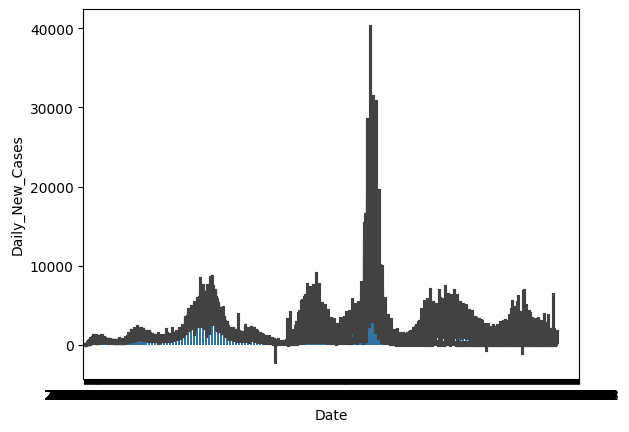

In [ ]:
#Make a quick plot to view how the data looks for daily new cases
sns.barplot(x = 'Date', y = 'Daily_New_Cases', data = state_level_df)

In [ ]:
#Now that the data is in the format wanted Unique ID's will be created for each row as this data will be pushed to a SQL database
#To start off each state will be given a Unique ID number using the factorize method
state_level_df['State_ID'] = pd.factorize(state_level_df['State'])[0].astype(str)

#Verify that the addition of the column worked
state_level_df

,State,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths,State_ID
0,Alabama,2020-03-13,6,0,0,0,0
1,Alabama,2020-03-14,12,5,0,0,0
2,Alabama,2020-03-15,23,8,0,0,0
3,Alabama,2020-03-16,29,6,0,0,0
4,Alabama,2020-03-17,39,8,0,0,0
...,...,...,...,...,...,...,...
55871,Wyoming,2023-03-19,185640,0,2009,0,49
55872,Wyoming,2023-03-20,185640,0,2009,0,49
55873,Wyoming,2023-03-21,185800,160,2014,5,49
55874,Wyoming,2023-03-22,185800,0,2014,0,49


In [ ]:
#Now that each state has a unique ID the date can be appended to make each row have a unique ID
#First the date needs to be converted to a string since we are appending
#We will also remove the "-" that is generated as we just want a single number not split up
state_level_df['Date_ID'] = state_level_df['Date'].astype(str).str.replace("-", "")

#Verify the addition of the new column by checking the head
state_level_df.head()

,State,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths,State_ID,Date_ID
0,Alabama,2020-03-13,6,0,0,0,0,20200313
1,Alabama,2020-03-14,12,5,0,0,0,20200314
2,Alabama,2020-03-15,23,8,0,0,0,20200315
3,Alabama,2020-03-16,29,6,0,0,0,20200316
4,Alabama,2020-03-17,39,8,0,0,0,20200317


In [ ]:
#Now that there are two columns that each contain half of the unique row ID we just need to make a single column contianing both pieces of data
state_level_df['Date_State_ID'] = state_level_df['State_ID'] + state_level_df['Date_ID']

#Verify that the unique ID was created by checking the head
state_level_df.head()

,State,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths,State_ID,Date_ID,Date_State_ID
0,Alabama,2020-03-13,6,0,0,0,0,20200313,020200313
1,Alabama,2020-03-14,12,5,0,0,0,20200314,020200314
2,Alabama,2020-03-15,23,8,0,0,0,20200315,020200315
3,Alabama,2020-03-16,29,6,0,0,0,20200316,020200316
4,Alabama,2020-03-17,39,8,0,0,0,20200317,020200317


In [ ]:
# Since we are pushing to a SQL database we will want to make a table that hold the state names so we can make relationships
states_IDs_df = state_level_df[['State_ID', 'State']].drop_duplicates()

#Verify the table by looking at the head
states_IDs_df.head()

,State_ID,State
0,0,Alabama
1106,1,Alaska
2213,2,Arizona
3366,3,Arkansas
4474,4,California


In [ ]:
#This will also add state abbriviations to the state_ids dataframe for later parts of this project
state_abbreviations = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
                      'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
                      'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
                      'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
                      'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
                      'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
                      'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
                      'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
                      'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
                      'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
                      'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

#This will create a new column to hold the state abbreviations
states_IDs_df['State_Abbreviation'] = states_IDs_df['State'].map(state_abbreviations)

#verify it worked by looking at the dataframe
states_IDs_df

,State_ID,State,State_Abbreviation
0,0,Alabama,AL
1106,1,Alaska,AK
2213,2,Arizona,AZ
3366,3,Arkansas,AR
4474,4,California,CA
5628,5,Colorado,CO
6742,6,Connecticut,CT
7853,7,Delaware,DE
8961,8,Florida,FL
10079,9,Georgia,GA


In [ ]:
#Since the unique id was created we can drop the extra columns that are no longer needed. We are keeping Date_ID since it will be used in a later section
state_level_df = state_level_df.drop(columns=['State'])

#Verify that the columns were dropped by looking at the head
state_level_df.head()

,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths,State_ID,Date_ID,Date_State_ID
0,2020-03-13,6,0,0,0,0,20200313,020200313
1,2020-03-14,12,5,0,0,0,20200314,020200314
2,2020-03-15,23,8,0,0,0,20200315,020200315
3,2020-03-16,29,6,0,0,0,20200316,020200316
4,2020-03-17,39,8,0,0,0,20200317,020200317


At this point the COVID data has been completely cleaned and explored to ensure the data is in the correct format that is being used for this project. Now we can move onto exploring and cleaning the airport data.

# Airport data:

## Import airport data and Explore it:

In [ ]:
# URL of the Airports.CSV data hosted on my personal Google Drive
# URL of shared data in google drive: https://drive.google.com/file/d/1IULaBj8O_paS8TaBrgWYxF0sRTICXbCS/view?usp=sharing
# Need to convert URL to direct download so pandas can read it
url = 'https://drive.google.com/uc?export=download&id=1IULaBj8O_paS8TaBrgWYxF0sRTICXbCS'

# Read the CSV file into a DataFrame
all_airport_codes_df = pd.read_csv(url)

In [ ]:
#Check the number of rows and columns of the dataframe
all_airport_codes_df.shape

(78747, 18)

In [ ]:
#Check the head of the dataframe
all_airport_codes_df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [ ]:
#Check the tail of the dataframe
all_airport_codes_df.tail()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
78742,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
78743,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
78744,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
78745,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,NaN,NaN,NaN,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96"
78746,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima,no,RJX7,NaN,RJX7,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [ ]:
#Check the datatypes of the dataframe
all_airport_codes_df.dtypes

id                     int64
ident                 object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
iso_country           object
iso_region            object
municipality          object
scheduled_service     object
gps_code              object
iata_code             object
local_code            object
home_link             object
wikipedia_link        object
keywords              object
dtype: object

In [ ]:
#Check for duplicate rows
duplicates = all_airport_codes_df.duplicated()
print(duplicates.sum())

0


In [ ]:
#This will see how many unique types there are since we are looking for only comercial airports

unique_types = all_airport_codes_df['type'].unique()

# Print the unique types of airports
print("Unique Airport Types:", unique_types)

Unique Airport Types: ['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']


As it can be seen from the data exploration there are a lot of columns that aren't very useful for this data engineering project. To clean up the data, the id, ident, type, name, iso_country, iso_region, and municipality columns will be saved as they are the most relevant to this project. Additionally, the country will be filtered out as this project is only looking at the United States. To make the dataframe more understandable the columns will also be renamed. Since there are no duplicates in the dataframe an additional check can be done during cleaning to see if the unique ID column is needed or not. Since we are looking at comercial flights the type column will help to filter out the major comercial airports.


## Clean and verify airport data:

In [ ]:
#This cell will drop all of the extra columns that are not needed
US_airport_codes_df = all_airport_codes_df[['id', 'ident', 'type', 'name',  'iso_country', 'iso_region', 'municipality']].copy()

#Verify that only the columns wanted are present
US_airport_codes_df.head()

,id,ident,type,name,iso_country,iso_region,municipality
0,6523,00A,heliport,Total RF Heliport,US,US-PA,Bensalem
1,323361,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti
2,6524,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point
3,6525,00AL,small_airport,Epps Airpark,US,US-AL,Harvest
4,506791,00AN,small_airport,Katmai Lodge Airport,US,US-AK,King Salmon


In [ ]:
# Get only the airports inside of the United States and get only small, medium, or large airports
US_airport_codes_df = US_airport_codes_df[US_airport_codes_df['iso_country'] == 'US']
airport_types = ['small_airport', 'medium_airport', 'large_airport']
US_airport_codes_df = US_airport_codes_df[US_airport_codes_df['type'].isin(airport_types)]

#Check the shape and the tail to verify its only US airports now
print(US_airport_codes_df.shape)
US_airport_codes_df.tail()

(15906, 7)


,id,ident,type,name,iso_country,iso_region,municipality
78015,26366,Z92,small_airport,Harsens Island Airport,US,US-MI,Harsens Island
78016,26367,Z93,small_airport,Copper Center 2 Airport,US,US-AK,Copper Center
78017,26368,Z95,small_airport,Cibecue Airport,US,US-AZ,Cibecue
78535,26369,ZNC,small_airport,Nyac Airport,US,US-AK,Nyac
78744,346788,ZZ-0003,small_airport,Fainting Goat Airport,US,US-TX,Blum


In [ ]:
#Rename some of the columns to make them more understandable
US_airport_codes_df.rename(columns={'id': 'Unique_ID', 'ident': 'Airport_ID', 'type': 'Type', 'name': 'Name', 'iso_country': 'Country',
                                    'iso_region': 'State', 'municipality': 'City'}, inplace=True)

#Verify the renaming worked by checking the head
US_airport_codes_df.head()

,Unique_ID,Airport_ID,Type,Name,Country,State,City
1,323361,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti
2,6524,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point
3,6525,00AL,small_airport,Epps Airpark,US,US-AL,Harvest
4,506791,00AN,small_airport,Katmai Lodge Airport,US,US-AK,King Salmon
6,322127,00AS,small_airport,Fulton Airport,US,US-OK,Alex


In [ ]:
# The airport ID is a unique identifier for all airports in the United States
# This cell will confirm they are unique and drop the the Unique ID if the Airport codes are Unique
#The Unique ID column was extra data  provided with the CSV for whatever purpose the data source was using it for
#This is more of a sanity check to see if the column is really needed

if US_airport_codes_df['Airport_ID'].is_unique:
    US_airport_codes_df.drop(columns='Unique_ID', inplace=True)
    #All the airport codes can be used as unique ID's
else:
    print("There are duplicate entries in 'Airport ID'.")

#If we determine the column can be dropped check the head to make sure it was successful
US_airport_codes_df.head()

,Airport_ID,Type,Name,Country,State,City
1,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti
2,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point
3,00AL,small_airport,Epps Airpark,US,US-AL,Harvest
4,00AN,small_airport,Katmai Lodge Airport,US,US-AK,King Salmon
6,00AS,small_airport,Fulton Airport,US,US-OK,Alex


In [ ]:
#Add in the state ID and replace the state columns this will be done since we are putting this dataframe into the relational database
#First make a new column that will strip the US- from each state abbreviation
US_airport_codes_df['State_Abbreviation'] = US_airport_codes_df['State'].str.split('-').str[1]

#Create a dictionary to hold the state abbreviation : state id number so that it can be mapped onto the next instruction
state_id_map = states_IDs_df.set_index('State_Abbreviation')['State_ID'].to_dict()

#Now that we have the state abbreviation only in a column we can make the state ID column and map it to the dictionary we made
US_airport_codes_df['State_ID'] = US_airport_codes_df['State_Abbreviation'].map(state_id_map)

#Verfiy by looking at the head of the dataframe
US_airport_codes_df.head()

,Airport_ID,Type,Name,Country,State,City,State_Abbreviation,State_ID
1,00AA,small_airport,Aero B Ranch Airport,US,US-KS,Leoti,KS,15
2,00AK,small_airport,Lowell Field,US,US-AK,Anchor Point,AK,1
3,00AL,small_airport,Epps Airpark,US,US-AL,Harvest,AL,0
4,00AN,small_airport,Katmai Lodge Airport,US,US-AK,King Salmon,AK,1
6,00AS,small_airport,Fulton Airport,US,US-OK,Alex,OK,35


In [ ]:
#Now that we can drop the country, state, city, and state abbreviation columns as they are not needed
US_airport_codes_df = US_airport_codes_df.drop(columns=['Country', 'State', 'City', 'State_Abbreviation'])

#Verify the drop worked by checking the head
US_airport_codes_df.head()

,Airport_ID,Type,Name,State_ID
1,00AA,small_airport,Aero B Ranch Airport,15
2,00AK,small_airport,Lowell Field,1
3,00AL,small_airport,Epps Airpark,0
4,00AN,small_airport,Katmai Lodge Airport,1
6,00AS,small_airport,Fulton Airport,35


In [ ]:
#This will drop any NaN values since we dont want them. We will just make them None instead
US_airport_codes_df = US_airport_codes_df.where(pd.notna(US_airport_codes_df), None)

,Airport_ID,Type,Name,State_ID
1,00AA,small_airport,Aero B Ranch Airport,15
2,00AK,small_airport,Lowell Field,1
3,00AL,small_airport,Epps Airpark,0
4,00AN,small_airport,Katmai Lodge Airport,1
6,00AS,small_airport,Fulton Airport,35
...,...,...,...,...
78015,Z92,small_airport,Harsens Island Airport,21
78016,Z93,small_airport,Copper Center 2 Airport,1
78017,Z95,small_airport,Cibecue Airport,2
78535,ZNC,small_airport,Nyac Airport,1


In [ ]:
#THis is used to verify the Airport_ID column is unique since it will be used as a primary key
duplicates = US_airport_codes_df['Airport_ID'].duplicated().sum()

#Print the result to ensure they are unique
print("This should be 0: " + str(duplicates))

This should be 0: 0


Now that the airport data is fully cleaned and useable for the application of this project the REST API can now reference this data to ensure the flights coming from the API are domestic to the United States. This cleaning needed to be done as the REST API will produce flights from all over the world in the time period being analyzed so extra data checks need to be done hence where this cleaned dataframe will come into play.

# REST API

In [ ]:
#To start off we will make a dataframe that contains the unique dates that the COVID data explores
dates_df = state_level_df[['Date']].drop_duplicates().reset_index(drop=True)

#Sort the dates in chronological order
dates_df = dates_df.sort_values(by='Date', ascending=True)

#Check the dataframe
dates_df

,Date
1155,2020-01-21
1156,2020-01-22
1157,2020-01-23
1154,2020-01-24
1153,2020-01-25
...,...
1101,2023-03-19
1102,2023-03-20
1103,2023-03-21
1104,2023-03-22


In [ ]:
#This should build up a list of specific dates since
# Only specific dates are going to be used due to the time it takes to do requests to the API
#The date ranges are estimated based off this website https://www.nytimes.com/interactive/2021/us/covid-cases.html Which is also the same source where some
#of the data came from
date_ranges = [
    ("2020-01-21", "2020-02-19"),  # The month after the very first COVID case was reported
    ("2020-10-28", "2020-11-15"),  # The first 2 weeks of the first major outbreak
    ("2021-02-03", "2021-02-18"),  # Two weeks on the falling side of the first peak
    ("2021-12-27", "2022-01-12"),  # The first weeks of the largest cases spike
    ("2022-02-13", "2022-03-01"),  # The falling weeks after the large outbreak
    ("2023-02-24", "2023-03-23")   # The month of the data
]


# Next generate a list of the above date ranges
selected_dates = []
for start, end in date_ranges:
    selected_dates.extend(pd.date_range(start=start, end=end))

# This will filter the old dates dataframe into only the dates we want to look at
dates_df = dates_df[dates_df['Date'].isin(selected_dates)]

#Verify the filtering worked
dates_df

,Date
1155,2020-01-21
1156,2020-01-22
1157,2020-01-23
1154,2020-01-24
1153,2020-01-25
...,...
1101,2023-03-19
1102,2023-03-20
1103,2023-03-21
1104,2023-03-22


In [ ]:
#The goal of this is to parallelize the API request since it takes so long to build up a complete set of data
# Each 2hour block request takes on average 6 seconds to complete
#This is why moring rush flgihts from 6am to 10am will be examined only for certian days that were built up before

#This cell should take about 10 minutes to run

#This is arbitrary JSON but here is the format:
# {"icao24":"a4f5b3",
#  "firstSeen":1682508222,
#  "estDepartureAirport":"KJNX",
#  "lastSeen":1682509047,
#  "estArrivalAirport":"KJNX",
#  "callsign":"N419BL  ",
#  "estDepartureAirportHorizDistance":1924,
#  "estDepartureAirportVertDistance":254,
#  "estArrivalAirportHorizDistance":1459,
#  "estArrivalAirportVertDistance":231,
#  "departureAirportCandidatesCount":0,
#  "arrivalAirportCandidatesCount":10}

def fetch_flights_for_segment(start_dt, airport_id):
    # add 2 hours to the start time since the API only lets request be within a 2 hour block of each other
    end_dt = start_dt + timedelta(hours=2)

    #The API requires UNIX time so convert it
    start_timestamp = int(start_dt.timestamp())
    end_timestamp = int(end_dt.timestamp())

    # API call setup
    api_url = f"https://opensky-network.org/api/flights/all?begin={start_timestamp}&end={end_timestamp}"
    response = requests.get(api_url)
    domestic_flights = [] #This will store all the US flights since the JSON gives worldwide flights
    detailed_fligh_data = [] #This will store the detailed flight data for a different dataframe
    if response.status_code == 200:
        flight_data = response.json() #This will give us the list of JSON objects
        for flight in flight_data:
          try:
            #Need a try catch incase there is a Key error if the data isn't present
            depart_airport = flight['estDepartureAirport'] #Get the airport callsign from the JSON
            arrive_airport = flight['estArrivalAirport'] #Get the airport callsign from the JSON
            if (depart_airport in airport_id) and (arrive_airport in airport_id):
              #Check to see if the flight is domestic
              domestic_flights.append(flight) #Add to this list so we can get the total number of flights
              detailed_fligh_data.append({
                  'Date': start_dt,
                  'Departure_Airport': depart_airport,
                  'Arrival_Airport': arrive_airport,
                  'Airplane_Callsign': flight['callsign']
              }) #This appends a list entry of a dict so that we can later convert to a dataframe
          except KeyError:
            #We only want solid domestic flight data so if its not solidified throw the data out
            continue
        return len(domestic_flights), detailed_fligh_data
    else:
        print(f"Error fetching data from time period: {start_dt} to {end_dt}. The API returned a HTTP Status of: {response.status_code}")
        return 0, []


def fetch_flights_for_morning_hours(date, airport_codes_id):
    total_flights = 0 #Start each day off with 0 flights
    detailed_flights_list = []

    start_date = datetime.strptime(date, '%Y-%m-%d')
    segments = [start_date + timedelta(hours=2 * i) for i in range(3, 5)]  # Create segments for 6 AM to 10 AM


    with ThreadPoolExecutor(max_workers=2) as executor: #We are using multithreading since each API request takes so long. This helps to make multiple request at the same time
        futures = [executor.submit(fetch_flights_for_segment, segment, airport_codes_id) for segment in segments]
        for future in as_completed(futures):
          total_count, flight_details = future.result() #Get the two objects returned by the method above
          total_flights += total_count #Get the count for the total number of flights
          detailed_flights_list.extend(flight_details) #Add the lists together to keep all the information


    return total_flights, detailed_flights_list


#This is the start of the code that will call the functions above
airport_ids = US_airport_codes_df['Airport_ID'].tolist() #Get all of the airport codes in list form from data frame

flights_df = dates_df.copy() #make a copy of the data frame so we don't get an error

#Make a new column and set the default values to 0
flights_df['Total_Domestic_Flights'] = 0

domestic_flight_details = [] #This will store all the flight details

#Loop through each row and calcualte the number of flights
for index, row in flights_df.iterrows():
  date_formatted = row['Date'].strftime('%Y-%m-%d') #Convert DateTime object to string
  total_flights, detailed_flight_data = fetch_flights_for_morning_hours(date_formatted, airport_ids)
  flights_df.at[index, 'Total_Domestic_Flights'] = total_flights #Add the total number of flights to out dataframe
  domestic_flight_details.extend(detailed_flight_data)


#Now create the new detailed flight dataframe (This will be verified in the next cell)
detailed_flight_data_df = pd.DataFrame(domestic_flight_details)

#Verify this worked by checkong the dataframe
flights_df

Error fetching data from time period: 2020-11-11 06:00:00 to 2020-11-11 08:00:00. The API returned a HTTP Status of: 504
Error fetching data from time period: 2020-11-12 06:00:00 to 2020-11-12 08:00:00. The API returned a HTTP Status of: 504
Error fetching data from time period: 2020-11-12 08:00:00 to 2020-11-12 10:00:00. The API returned a HTTP Status of: 504
Error fetching data from time period: 2020-11-14 06:00:00 to 2020-11-14 08:00:00. The API returned a HTTP Status of: 504


,Date,Total_Domestic_Flights
1155,2020-01-21,232
1156,2020-01-22,229
1157,2020-01-23,216
1154,2020-01-24,214
1153,2020-01-25,192
...,...,...
1101,2023-03-19,193
1102,2023-03-20,221
1103,2023-03-21,282
1104,2023-03-22,285


In [ ]:
#Verify the detailed flights dataframe that was creadted
detailed_flight_data_df

,Date,Departure_Airport,Arrival_Airport,Airplane_Callsign
0,2020-01-21 08:00:00,KTPA,KVDF,N101DL
1,2020-01-21 08:00:00,PAEN,PANC,RVF847
2,2020-01-21 08:00:00,PANC,PAEN,RVF846
3,2020-01-21 08:00:00,KIND,KATL,FDX1703
4,2020-01-21 08:00:00,KPHL,K4B8,UPS1122
...,...,...,...,...
26823,2023-03-23 08:00:00,KJWN,TN79,N524MT
26824,2023-03-23 08:00:00,KSDF,KRIC,UPS1232
26825,2023-03-23 08:00:00,KEWR,KBOS,FDX1989
26826,2023-03-23 08:00:00,KSTL,KCVG,ATN4372


In [ ]:
#This cell will check the dataframes type so we can make sure the date is still in DateTime
detailed_flight_data_df.dtypes

Date                 datetime64[ns]
Departure_Airport            object
Arrival_Airport              object
Airplane_Callsign            object
dtype: object

In [ ]:
#This will create a unique dateID that will be related to the covid dataframe.
#First we will get rid of the time stamp in the date column and then make the date_ID
detailed_flight_data_df['Date'] = detailed_flight_data_df['Date'].dt.date

#Convert back to datetime
detailed_flight_data_df['Date'] = pd.to_datetime(detailed_flight_data_df['Date'])

#then we can make the date id
detailed_flight_data_df['Date_ID'] = detailed_flight_data_df['Date'].astype(str).str.replace("-", "")

#To verify we can check the head
detailed_flight_data_df.head()

,Date,Departure_Airport,Arrival_Airport,Airplane_Callsign,Date_ID
0,2020-01-21,KTPA,KVDF,N101DL,20200121
1,2020-01-21,PAEN,PANC,RVF847,20200121
2,2020-01-21,PANC,PAEN,RVF846,20200121
3,2020-01-21,KIND,KATL,FDX1703,20200121
4,2020-01-21,KPHL,K4B8,UPS1122,20200121


In [ ]:
#This cell will add the arrivals and departures state ID columns
#This will creat a dictonary with the stateID's as the values and the airport codes as the
airport_to_state_codes = pd.Series(US_airport_codes_df.State_ID.values, index=US_airport_codes_df.Airport_ID).to_dict()

detailed_flight_data_df['Departure_State_ID'] = detailed_flight_data_df['Departure_Airport'].map(airport_to_state_codes)
detailed_flight_data_df['Arrival_State_ID'] = detailed_flight_data_df['Arrival_Airport'].map(airport_to_state_codes)

#Vefiry this worked by checking the Head
detailed_flight_data_df.head()

,Date,Departure_Airport,Arrival_Airport,Airplane_Callsign,Date_ID,Departure_State_ID,Arrival_State_ID
0,2020-01-21,KTPA,KVDF,N101DL,20200121,8,8
1,2020-01-21,PAEN,PANC,RVF847,20200121,1,1
2,2020-01-21,PANC,PAEN,RVF846,20200121,1,1
3,2020-01-21,KIND,KATL,FDX1703,20200121,13,9
4,2020-01-21,KPHL,K4B8,UPS1122,20200121,37,6


In [ ]:
#This will ensure there are no NaN values in the data as we dont want them. We will just make them null
detailed_flight_data_df = detailed_flight_data_df.where(pd.notna(detailed_flight_data_df), None)

,Date,Departure_Airport,Arrival_Airport,Airplane_Callsign,Date_ID,Departure_State_ID,Arrival_State_ID
0,2020-01-21,KTPA,KVDF,N101DL,20200121,8,8
1,2020-01-21,PAEN,PANC,RVF847,20200121,1,1
2,2020-01-21,PANC,PAEN,RVF846,20200121,1,1
3,2020-01-21,KIND,KATL,FDX1703,20200121,13,9
4,2020-01-21,KPHL,K4B8,UPS1122,20200121,37,6
...,...,...,...,...,...,...,...
26823,2023-03-23,KJWN,TN79,N524MT,20230323,41,41
26824,2023-03-23,KSDF,KRIC,UPS1232,20230323,16,45
26825,2023-03-23,KEWR,KBOS,FDX1989,20230323,29,20
26826,2023-03-23,KSTL,KCVG,ATN4372,20230323,24,16


In [ ]:
#The final step will be to make a unique ID primary key for this dataframe.
#The Unique ID will consist of the the  Departure_State_ID, Arrival_State_ID, Airplane_Callsign , Date_ID

#First we will make new columns that have the data in string format
detailed_flight_data_df['Departure_Airport_str'] = detailed_flight_data_df['Departure_State_ID'].astype(str)
detailed_flight_data_df['Arrival_Airport_str'] = detailed_flight_data_df['Arrival_State_ID'].astype(str)
detailed_flight_data_df['Airplane_Callsign_str'] = detailed_flight_data_df['Airplane_Callsign'].astype(str)
detailed_flight_data_df['Date_ID_str'] = detailed_flight_data_df['Date_ID'].astype(str)

#Then we can create our Unique ID
detailed_flight_data_df['Flight_ID'] = detailed_flight_data_df['Departure_Airport_str'] + detailed_flight_data_df['Arrival_Airport_str'] + detailed_flight_data_df['Airplane_Callsign_str'] + detailed_flight_data_df['Date_ID_str']

#Now can can drop the extra columns that we created
detailed_flight_data_df = detailed_flight_data_df.drop(columns=['Departure_Airport_str', 'Arrival_Airport_str', 'Airplane_Callsign_str', 'Date_ID_str'])

#Verify the ID was created by checking the head
detailed_flight_data_df.head()

,Date,Departure_Airport,Arrival_Airport,Airplane_Callsign,Date_ID,Departure_State_ID,Arrival_State_ID,Flight_ID
0,2020-01-21,KTPA,KVDF,N101DL,20200121,8,8,88N101DL 20200121
1,2020-01-21,PAEN,PANC,RVF847,20200121,1,1,11RVF847 20200121
2,2020-01-21,PANC,PAEN,RVF846,20200121,1,1,11RVF846 20200121
3,2020-01-21,KIND,KATL,FDX1703,20200121,13,9,139FDX1703 20200121
4,2020-01-21,KPHL,K4B8,UPS1122,20200121,37,6,376UPS1122 20200121


In [ ]:
#Ensure the ID's are unique
duplicates = detailed_flight_data_df['Flight_ID'].duplicated().sum()

#Print the result to ensure they are unique
print("This should be 0: " + str(duplicates))

This should be 0: 1949


In [ ]:
#As it can be seen the ID's aren't unique so we need to impliment some logic to fix this
#for simplicity we will append the row number at the end of the ID to ensure its unique
detailed_flight_data_df['Flight_ID'] = detailed_flight_data_df['Flight_ID'] + detailed_flight_data_df.index.astype(str)

#Verify all entries are unique now
duplicates = detailed_flight_data_df['Flight_ID'].duplicated().sum()

#Print the result to ensure they are unique
print("This should be 0: " + str(duplicates))

This should be 0: 0


In [ ]:
#Now that we have a dataframe with the flight values for the specific days we can fill in the
#missing dates with 0's since we want to have an accuarat timeline depiciton

#First make a copy of the data frame since API takes so long to run
flights_df_copy = flights_df.copy()

#Then set the index of the flights dataframe to the Date column and sort the dates in order
flights_df_copy.set_index('Date', inplace=True)
flights_df_copy = flights_df_copy.sort_values(by='Date', ascending=True)

#Use the previous dates dataframe that is not used to get all the Unique dates and sort them in order
dates_df = state_level_df[['Date']].drop_duplicates().reset_index(drop=True)
dates_df = dates_df.sort_values(by='Date', ascending=True)

#Now set the Date as the index for this dataframe as well sine we will be filling in the missing dates
dates_df.set_index('Date', inplace=True)

#Now add in all the missing dates and set their values to 0 since we don't have date from them
flights_df_copy = flights_df_copy.reindex(dates_df.index, fill_value=0)

#Reset the Index again so the Date column will still be a column and not the index
flights_df_copy.reset_index(inplace=True)

# Check the resulting DataFrame by looking at the head to make sure 0's were filled in
flights_df_copy.head(40)

,Date,Total_Domestic_Flights
0,2020-01-21,232
1,2020-01-22,229
2,2020-01-23,216
3,2020-01-24,214
4,2020-01-25,192
5,2020-01-26,145
6,2020-01-27,163
7,2020-01-28,213
8,2020-01-29,230
9,2020-01-30,203


In [ ]:
#This will create a unique dateID that will be related to the covid dataframe.
flights_df_copy['Date_ID'] = flights_df_copy['Date'].astype(str).str.replace("-", "")

#Check the head of the dataframe to make sure the ID worked and make sure its unique
duplicates = flights_df_copy['Date_ID'].duplicated().sum()

print("Should be 0 to ensure uniqueness: ", str(duplicates))

flights_df_copy.head()

Should be 0 to ensure uniqueness:  0


,Date,Total_Domestic_Flights,Date_ID
0,2020-01-21,232,20200121
1,2020-01-22,229,20200122
2,2020-01-23,216,20200123
3,2020-01-24,214,20200124
4,2020-01-25,192,20200125


<Axes: xlabel='Date', ylabel='Total_Domestic_Flights'>

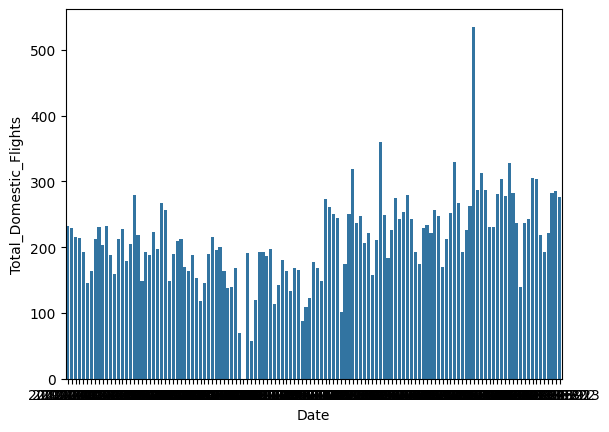

In [ ]:
#Make a quick plot to view how the data looks for daily new cases
sns.barplot(x = 'Date', y = 'Total_Domestic_Flights', data = flights_df)

# SQL Database

In [ ]:
#This cell will connect to the SQL server in AWS
mysql_address  = ''
mysql_username=''
mysql_password=''
mysql_database = ''

def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

conn, cur = get_conn_cur()

#Check to make sure we got the connection
conn

In [ ]:
#These are helper function that will be used to run queries and check the head of a table
def run_query(query_string):
  conn, cur = get_conn_cur() # get connection and cursor
  cur.execute(query_string) # executing string as before
  my_data = cur.fetchall() # fetch query data as before
  result_df = pd.DataFrame(my_data, columns=cur.column_names)
  cur.close() # close
  conn.close() # close
  return result_df


def sql_head(table_name):
  conn, cur = get_conn_cur() #get connection and cursor

  #get head information
  table_rows_query = """ SELECT * FROM %s LIMIT 5; """ % table_name
  cur.execute(table_rows_query)
  my_data = cur.fetchall() # fetch results

  # Create a dataframe that combines sql table with column names and return
  df = pd.DataFrame(my_data, columns=cur.column_names)

  cur.close()
  conn.close()
  return df

# Drop table
def drop_table(table_name):
  conn, cur = get_conn_cur()
  drop_table_statement = "DROP TABLE %s;"%table_name # make your statement
  cur.execute(drop_table_statement) # execute it
  conn.commit()
  cur.close() # close your cursor

In [ ]:
#Drop tables if needed
# drop_table('final_state_level_df')
# drop_table('final_state_IDs_df')
# drop_table('final_US_airport_codes_df')
#drop_table('final_detailed_flight_data_df')
#drop_table('final_flights_df')

In [ ]:
#This cell will create all five tables

# Create state_level_df
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE IF NOT EXISTS final_state_level_df (
     Date_State_ID BIGINT PRIMARY KEY,
     Date_ID INTEGER NOT NULL,
     State_ID VARCHAR(255) NOT NULL,
     Date timestamp NOT NULL,
     Total_Cases INTEGER NOT NULL,
     Daily_New_Cases INTEGER NOT NULL,
     Total_Deaths INTEGER NOT NULL,
     Daily_New_Deaths INTEGER NOT NULL
     );"""
cur.execute(tq)
conn.commit()
conn.close()

# Create states_IDs_df
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE IF NOT EXISTS final_state_IDs_df (
     State_ID VARCHAR(255) PRIMARY KEY,
     State VARCHAR(255) NOT NULL,
     State_Abbreviation VARCHAR(255) NOT NULL
     );"""
cur.execute(tq)
conn.commit()
conn.close()

# Create US_airport_codes_df
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE IF NOT EXISTS final_US_airport_codes_df (
     Airport_ID VARCHAR(255) PRIMARY KEY,
     Type VARCHAR(255),
     Name VARCHAR(255),
     State_ID VARCHAR(255)
     );"""
cur.execute(tq)
conn.commit()
conn.close()

# detailed_flight_data_df
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE IF NOT EXISTS final_detailed_flight_data_df (
     Flight_ID VARCHAR(255) PRIMARY KEY,
     Arrival_State_ID VARCHAR(255),
     Departure_State_ID VARCHAR(255),
     Date_ID INTEGER,
     Airplane_Callsign VARCHAR(255),
     Arrival_Airport VARCHAR(255),
     Departure_Airport VARCHAR(255),
     Date timestamp
     );"""
cur.execute(tq)
conn.commit()
conn.close()

# Create flights_df_copy
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE IF NOT EXISTS final_flights_df (
     Date_ID INTEGER PRIMARY KEY,
     Total_Domestic_Flights INTEGER NOT NULL,
     Date timestamp NOT NULL
     );"""
cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
#Verify the tables were created by running show tables query
run_query("SHOW TABLES")

,Tables_in_ISTA322dbs
0,casedb_cases
1,casedb_casetype
2,casedb_category
3,casedb_judge
4,casedb_rollup
5,coviddb_states
6,coviddb_weekly_stats
7,final_US_airport_codes_df
8,final_detailed_flight_data_df
9,final_flights_df


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_state_level_df')

,Date_State_ID,Date_ID,State_ID,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_state_IDs_df')

,State_ID,State,State_Abbreviation


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_US_airport_codes_df')

,Airport_ID,Type,Name,State_ID


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_detailed_flight_data_df')

,Flight_ID,Arrival_State_ID,Departure_State_ID,Date_ID,Airplane_Callsign,Arrival_Airport,Departure_Airport,Date


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_flights_df')

,Date_ID,Total_Domestic_Flights,Date


In [ ]:
#This cell will insert data into the final_state_level_df table

#Reorder the dataframe so it matches the SQL table
state_level_df = state_level_df[['Date_State_ID', 'Date_ID' ,'State_ID' , 'Date' ,'Total_Cases' ,'Daily_New_Cases' ,'Total_Deaths' , 'Daily_New_Deaths']]

#Create a tuple for each row of data
data_tups = [tuple(x) for x in state_level_df.to_numpy()]

# Make the insert query
iq = """INSERT INTO final_state_level_df (Date_State_ID, Date_ID ,State_ID , Date ,Total_Cases ,Daily_New_Cases ,Total_Deaths , Daily_New_Deaths) VALUES(%s, %s, %s, %s, %s, %s, %s, %s);"""

# Upload data into table
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
#This cell will insert data into the final_state_IDs_df table

#Reorder the dataframe so it matches the SQL table
states_IDs_df = states_IDs_df[['State_ID', 'State', 'State_Abbreviation']]

#Create a tuple for each row of data
data_tups = [tuple(x) for x in states_IDs_df.to_numpy()]

# Make the insert query
iq = """INSERT INTO final_state_IDs_df (State_ID, State, State_Abbreviation) VALUES(%s, %s, %s);"""

# Upload data into table
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
#This cell will insert data into the final_US_airport_codes_df table

#Reorder the dataframe so it matches the SQL table
US_airport_codes_df = US_airport_codes_df[['Airport_ID', 'Type', 'Name', 'State_ID']]

#Create a tuple for each row of data
data_tups = [tuple(x) for x in US_airport_codes_df.to_numpy()]

# Make the insert query
iq = """INSERT INTO final_US_airport_codes_df (Airport_ID, Type, Name, State_ID) VALUES(%s, %s, %s, %s);"""

# Upload data into table
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
#This cell will insert data into the final_detailed_flight_data_df table

#Reorder the dataframe so it matches the SQL table
detailed_flight_data_df = detailed_flight_data_df[['Flight_ID', 'Arrival_State_ID', 'Departure_State_ID', 'Date_ID', 'Airplane_Callsign', 'Arrival_Airport', 'Departure_Airport', 'Date']]

#Create a tuple for each row of data
data_tups = [tuple(x) for x in detailed_flight_data_df.to_numpy()]

# Make the insert query
iq = """INSERT INTO final_detailed_flight_data_df (Flight_ID, Arrival_State_ID, Departure_State_ID, Date_ID, Airplane_Callsign, Arrival_Airport, Departure_Airport, Date) VALUES(%s, %s, %s, %s, %s, %s, %s, %s);"""

# Upload data into table
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
#This cell will insert data into the final_flights_df table

#Reorder the dataframe so it matches the SQL table
flights_df_copy = flights_df_copy[['Date_ID', 'Total_Domestic_Flights', 'Date']]

#Create a tuple for each row of data
data_tups = [tuple(x) for x in flights_df_copy.to_numpy()]

# Make the insert query
iq = """INSERT INTO final_flights_df (Date_ID, Total_Domestic_Flights, Date) VALUES(%s, %s, %s);"""

# Upload data into table
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_state_level_df')

,Date_State_ID,Date_ID,State_ID,Date,Total_Cases,Daily_New_Cases,Total_Deaths,Daily_New_Deaths
0,20200313,20200313,0,2020-03-13,6,0,0,0
1,20200314,20200314,0,2020-03-14,12,5,0,0
2,20200315,20200315,0,2020-03-15,23,8,0,0
3,20200316,20200316,0,2020-03-16,29,6,0,0
4,20200317,20200317,0,2020-03-17,39,8,0,0


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_state_IDs_df')

,State_ID,State,State_Abbreviation
0,0,Alabama,AL
1,1,Alaska,AK
2,10,Hawaii,HI
3,11,Idaho,ID
4,12,Illinois,IL


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_US_airport_codes_df')

,Airport_ID,Type,Name,State_ID
0,00AA,small_airport,Aero B Ranch Airport,15
1,00AK,small_airport,Lowell Field,1
2,00AL,small_airport,Epps Airpark,0
3,00AN,small_airport,Katmai Lodge Airport,1
4,00AS,small_airport,Fulton Airport,35


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_detailed_flight_data_df')

,Flight_ID,Arrival_State_ID,Departure_State_ID,Date_ID,Airplane_Callsign,Arrival_Airport,Departure_Airport,Date
0,000972118 2023031123711,0,0,20230311,0972118,KOZR,KOZR,2023-03-11
1,001772407 2023030822747,0,0,20230308,1772407,KEDN,KTOI,2023-03-08
2,00BVN7356 2022010413303,0,0,20220104,BVN7356,KMSL,KHSV,2022-01-04
3,00N144CH 2023022519658,0,0,20230225,N144CH,4AL8,KHUA,2023-02-25
4,00N160SA 2023022519674,0,0,20230225,N160SA,KMGM,KSEM,2023-02-25


In [ ]:
# Also verfiy by checking the head of each table
sql_head('final_flights_df')

,Date_ID,Total_Domestic_Flights,Date
0,20200121,232,2020-01-21
1,20200122,229,2020-01-22
2,20200123,216,2020-01-23
3,20200124,214,2020-01-24
4,20200125,192,2020-01-25


## SQL queries

In [ ]:
#Query 1:
#This query tells us the total number of flights compared to the total number of states (its important to note that this is not a full set of flight data)
# Even though its not a full set of flight dtata it can still see which states shut down travel the most during COVID
query = """SELECT s.State, COUNT(DISTINCT f.Flight_ID) AS Total_Flights, SUM(c.Total_Cases) AS Total_Cases
FROM final_detailed_flight_data_df f
JOIN final_US_airport_codes_df a ON f.Arrival_Airport = a.Airport_ID
JOIN final_state_IDs_df s ON a.State_ID = s.State_ID
JOIN final_state_level_df c ON s.State_ID = c.State_ID AND f.Date_ID = c.Date_ID
GROUP BY s.State
ORDER BY Total_Cases DESC;"""

run_query(query)

,State,Total_Flights,Total_Cases
0,California,5702,31759904375
1,Texas,1268,6613132397
2,Florida,974,4753319808
3,New York,668,2616331314
4,Pennsylvania,958,2081443488
5,Arizona,1519,1948085893
6,North Carolina,652,1445431475
7,Illinois,686,1394706661
8,Washington,1504,1374304041
9,Ohio,541,1177329799


In [ ]:
#Query 2:
#This query tells us how the same state flights were effected by COVID. (its important to note that this is not a full set of flight data)
# Even though its not a full set of flight data it can still help to make inferences.
query = """SELECT a.Date, s.State AS Arrival_State_Name, s.State AS Departure_State_Name, a.Total_Domestic_Flights, c.Total_Cases
FROM final_flights_df a
JOIN final_detailed_flight_data_df f ON a.Date_ID = f.Date_ID
JOIN final_state_level_df c ON a.Date_ID = c.Date_ID
JOIN final_state_IDs_df s ON f.Arrival_State_ID = s.State_ID
WHERE f.Arrival_State_ID = f.Departure_State_ID
ORDER BY a.Date;"""

run_query(query)

,Date,Arrival_State_Name,Departure_State_Name,Total_Domestic_Flights,Total_Cases
0,2020-01-21,Georgia,Georgia,232,1
1,2020-01-21,Georgia,Georgia,232,1
2,2020-01-21,Georgia,Georgia,232,1
3,2020-01-21,Florida,Florida,232,1
4,2020-01-21,Florida,Florida,232,1
...,...,...,...,...,...
576318,2023-03-23,California,California,276,1369930
576319,2023-03-23,California,California,276,1369930
576320,2023-03-23,California,California,276,1369930
576321,2023-03-23,California,California,276,1369930


In [ ]:
#Query 3:
#This query tells us information similar to the first query but it examines the total deaths per each state compared to the total flight
#This can be used to make inferences about population versus flights as higher populated aread will have higher deaths
query = """SELECT s.State, COUNT(DISTINCT f.Flight_ID) AS Total_Flights, SUM(c.Total_Deaths) AS Total_Deaths
FROM final_detailed_flight_data_df f
JOIN  final_US_airport_codes_df a ON f.Arrival_Airport = a.Airport_ID
JOIN final_state_IDs_df s ON a.State_ID = s.State_ID
JOIN final_state_level_df c ON s.State_ID = c.State_ID AND f.Date_ID = c.Date_ID
GROUP BY s.State
ORDER BY Total_Deaths DESC; """

run_query(query)

,State,Total_Flights,Total_Deaths
0,California,5702,314571509
1,Texas,1268,84484631
2,Florida,974,59019146
3,New York,668,39705009
4,Pennsylvania,958,33627822
5,Arizona,1519,28571939
6,Illinois,686,16871466
7,Ohio,541,15558539
8,Georgia,493,14436410
9,North Carolina,652,13356178


In [ ]:
#Query 4:
#This query tells us the total number of flights to Arizona based on the daily number of COVID cases (its important to note that this is not a full set of flight data)
# Even though its not a full set of flight data it can still help to make inferences.
query = """SELECT f.Date, COUNT(f.Flight_ID) AS Daily_Flights_to_Arizona, c.Daily_New_Cases AS New_Covid_Cases_in_Arizona
FROM final_detailed_flight_data_df f
JOIN final_state_level_df c ON f.Date_ID = c.Date_ID AND c.State_ID = '2'
WHERE f.Arrival_State_ID = '2'
GROUP BY f.Date, c.Daily_New_Cases
ORDER BY  f.Date;"""

run_query(query)

,Date,Daily_Flights_to_Arizona,New_Covid_Cases_in_Arizona
0,2020-01-26,22,0
1,2020-01-27,14,0
2,2020-01-28,9,0
3,2020-01-29,12,0
4,2020-01-30,15,0
...,...,...,...
116,2023-03-19,13,0
117,2023-03-20,10,0
118,2023-03-21,15,0
119,2023-03-22,7,2656


In [ ]:
#Query 5:
#This query tells us the total number of flights per month compared to the total number of covid cases per month
#Since the flight data is incomplete it is filled with 0's
query = """SELECT  EXTRACT(YEAR FROM f.Date) AS Year, EXTRACT(MONTH FROM f.Date) AS Month, SUM(f.Total_Domestic_Flights) AS Total_Flights, SUM(c.Daily_New_Cases) AS Total_New_Covid_Cases
FROM final_flights_df f
JOIN final_state_level_df c ON f.Date_ID = c.Date_ID
GROUP BY Year, Month
ORDER BY Year, Month;
"""

run_query(query)

,Year,Month,Total_Flights,Total_New_Covid_Cases
0,2020,1,6425,1
1,2020,2,24915,34
2,2020,3,0,184432
3,2020,4,0,880425
4,2020,5,0,716852
5,2020,6,0,847115
6,2020,7,0,1906207
7,2020,8,0,1453728
8,2020,9,0,1198927
9,2020,10,33700,1925097
